[[6.90420723 0.37762439]
 [5.90926266 0.36117637]
 [6.27963829 0.23415378]
 ...
 [6.80200529 0.4512566 ]
 [5.93461704 0.48737684]
 [5.83353329 0.83914489]]
[[6.52276564 0.19658339]
 [6.80563211 0.30216107]
 [6.52396393 0.20921214]
 ...
 [6.35927725 1.09222615]
 [6.45292091 0.31493488]
 [5.70978117 2.49246669]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


ValueError: It looks like the parameter(s) in column(s) 0, 1 have no dynamic range. Please provide a `range` argument.

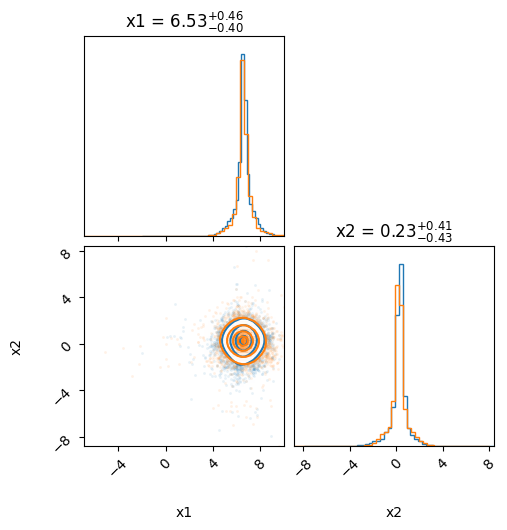

In [ ]:
import sbibm
import matplotlib
import matplotlib.lines as mlines

import matplotlib.pyplot as plt
import numpy as np
import corner
# import seaborn as sns

path_to_data = "../scripts/data/"
num_epochs = 81
check_every = 10

i_obs = 8


example_name = "gaussian_mixture"
task = sbibm.get_task(example_name)
prior = task.get_prior_dist()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=i_obs+1)
data_test = np.array(task.get_reference_posterior_samples(num_observation=i_obs+1))
bbox_to_anchor=(0.0, 1.0, 1.0, 1.0)

train_data = [500]

colors = [f"C{i}" for i in range(8)]
i = 0

num_train = 500
data = np.load(path_to_data+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")

print(data)

fig = None
for j in range(3):
    samples = data['post_samples'][i_obs,j]
    print(samples)
    fig = corner.corner(samples, labels=['x1', 'x2'], show_titles=True, color=colors[j], bins=50, smooth=2, hist_kwargs={'density': True}, fig=fig);

corner.corner(data_test, labels=['x1', 'x2'], show_titles=True, color='black', bins=50, smooth=2, hist_kwargs={'density': True}, fig=fig, );

custom_lines = [matplotlib.patches.Patch(facecolor=colors[j], label='Samples training \ndataset size: ' + str(train_data[i])), 
                matplotlib.patches.Patch(facecolor='black', label='True posterior'),]


plt.legend(handles=custom_lines, bbox_to_anchor=bbox_to_anchor, loc=0)
plt.savefig(f'final_plots/corner_plot_{num_train}.pdf', bbox_inches='tight')